In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
path = os.path.expanduser("~/cacofoni/cacofoni/__init__.py")
print("Exists?", os.path.exists(path))

Exists? True


In [73]:
# Test make_cacofoni.py
%autoreload 2
from cacofoni.make_cacofoni import make_cacofoni
from cacofoni.imaka_io.irdfits import irdfits
from cacofoni.config import CacofoniConfig
laplacian, imatcacophony, idx = make_cacofoni()

Setting up make_cacofoni...
Assumptions from configuration file:
Override these values in the configuration file.
------------------------------------------------
Minimum frequency (Hz)      = 4.0
Maximum frequency (Hz)      = 10.0
Sampling Frequency (Hz)     = 996
Maximum number of WFS       = 5
Number of actuators         = 36
Closed/Open Loop            = Open
Modal/Zonal                 = Zonal
Laplacian?                  = Yes
------------------------------------------------

File Paths:
Override these paths in make_cacofoni arguments.
------------------------------------------------
Telemetry file             = /home/bpeck/cacofoni/cacofoni/data/aocb0090.fits
Parameter file             = /home/bpeck/cacofoni/cacofoni/data/imakaparm.txt
Mirror Modes file:         = N/A
------------------------------------------------

Loading telemetry data with irdfits...

Assumptions from telemetery FITS file:
------------------------------------------------
Number of time steps        = 27000
N

In [79]:
print(imatcacophony.shape)
print(imatcacophony[200])

(288, 36)
[ 4.41162443e+00  1.82538128e+01  2.44741678e-01 -7.58064151e-01
  1.06350338e+00  9.23332572e-01 -2.68895388e-01  4.63299483e-01
  3.48051977e+00  1.03944645e+01  2.87081718e+00 -2.05673389e+01
 -6.76977968e+00 -1.16074979e+00 -1.56779736e-02  3.72674689e-02
 -1.12202190e-01 -3.01741362e-01 -6.33866414e-02 -1.24342889e-01
 -3.30193251e-01 -5.03802657e-01 -4.73731123e-02  1.70416903e+00
  1.69528270e+00 -4.21443081e+00 -6.27978611e+00 -2.14157915e+00
  3.78254056e-01  5.03400207e-01  1.89113110e-01  1.24887951e-01
  6.83496445e-02 -2.56333351e-02 -2.43216962e-01 -2.88234768e-03]


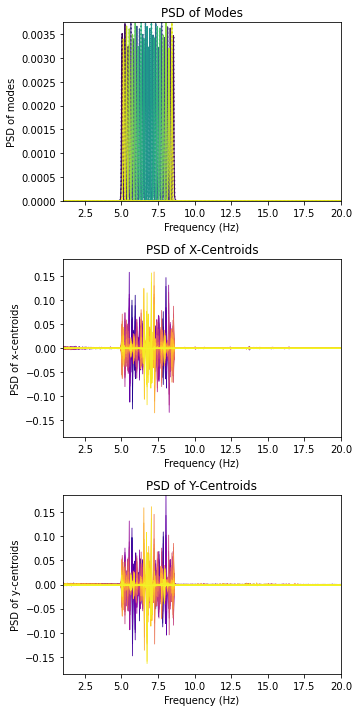

In [51]:
import numpy as np
import matplotlib.pyplot as plt

config = CacofoniConfig
nmodes = 36

plt.figure(figsize=(5, 10))

plt.subplot(3, 1, 1)

xrange = [max(config.minimum_frequency - 10, 1), config.maximum_frequency + 10]
yrange = [np.min(psdmod), np.max(psdmod[:, 5:])]

plt.plot(freq, psdmod[0, :], label='Mode 0', linewidth=1)

for i in range(nmodes):
    color = plt.cm.viridis(i / nmodes)
    plt.plot(freq, psdmod[i, :], color=color, linewidth=1)
    plt.plot(freq, filter1[:, i] * psdmod[i, :], color=color, linestyle='dotted')

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD of modes')
plt.xlim(xrange)
plt.ylim(yrange)
plt.title('PSD of Modes')

# ---- Panel 2: PSD of X Centroids ----
plt.subplot(3, 1, 2)

yrange = [-np.max(np.abs(psdmes[:, 5:])), np.max(np.abs(psdmes[:, 5:]))]

plt.plot(freq, psdmes[16, :], linewidth=1)

for i in range(144):
    color = plt.cm.plasma(i / 144)
    plt.plot(freq, psdmes[i, :], color=color, linewidth=0.8)

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD of x-centroids')
plt.xlim(xrange)
plt.ylim(yrange)
plt.title('PSD of X-Centroids')

# ---- Panel 3: PSD of Y Centroids ----
plt.subplot(3, 1, 3)

plt.plot(freq, psdmes[160, :], linewidth=1)

for i in range(144):
    color = plt.cm.plasma(i / 144)
    plt.plot(freq, psdmes[i + 144, :], color=color, linewidth=0.8)

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD of y-centroids')
plt.xlim(xrange)
plt.ylim(yrange)
plt.title('PSD of Y-Centroids')

plt.tight_layout()
plt.show()


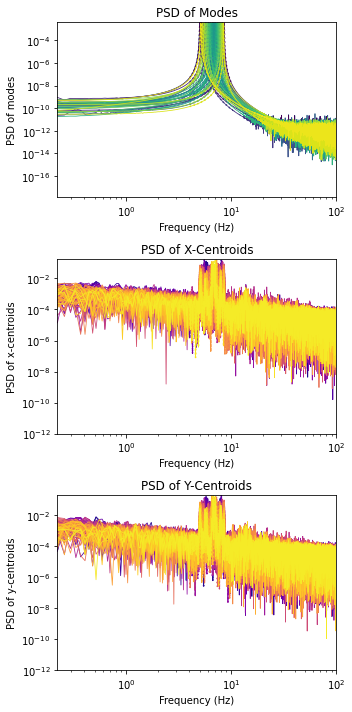

In [59]:
plt.figure(figsize=(5, 10))  # IDL: window,2,xsi=500,ysi=1000
n_panels = 3

# ------------------------
# Panel 1: PSD of Modes
# ------------------------
plt.subplot(n_panels, 1, 1)
xrange = [freq[5], 100]
yrange = [np.min(psdmod), np.max(psdmod[:, 5:])]

plt.plot(freq, psdmod[0, :], linewidth=1)

for i in range(nmodes):
    color = plt.cm.viridis(i / nmodes)
    plt.plot(freq, psdmod[i, :], color=color, linewidth=0.8)
    plt.plot(freq[filter], psdmod[i, filter], color=color, linestyle='dotted')

plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD of modes")
plt.xlim(xrange)
plt.ylim(yrange)
plt.yscale('log')
plt.xscale('log')
plt.title("PSD of Modes")

# ------------------------
# Panel 2: PSD of X-Centroids
# ------------------------
plt.subplot(n_panels, 1, 2)
yrange = [max(np.min(np.abs(psdmes)), 1e-12), np.max(np.abs(psdmes[:, 5:]))]

plt.plot(freq, np.abs(psdmes[16, :]), linewidth=1)

for i in range(144):
    color = plt.cm.plasma(i / 144)
    plt.plot(freq, np.abs(psdmes[i, :]), color=color, linewidth=0.8)
    plt.plot(freq[filter], np.abs(psdmes[i, :])[filter], color=color, linestyle='dotted')

plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD of x-centroids")
plt.xlim(xrange)
plt.ylim(yrange)
plt.yscale('log')
plt.xscale('log')
plt.title("PSD of X-Centroids")

# ------------------------
# Panel 3: PSD of Y-Centroids
# ------------------------
plt.subplot(n_panels, 1, 3)
plt.plot(freq, np.abs(psdmes[160, :]), linewidth=1)

for i in range(144):
    color = plt.cm.plasma(i / 144)
    plt.plot(freq, np.abs(psdmes[i + 144, :]), color=color, linewidth=0.8)
    plt.plot(freq[filter], np.abs(psdmes[i + 144, :])[filter], color=color, linestyle='dotted')
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD of y-centroids")
plt.xlim(xrange)
plt.ylim(yrange)
plt.yscale('log')
plt.xscale('log')
plt.title("PSD of Y-Centroids")

# Layout
plt.tight_layout()
plt.show()


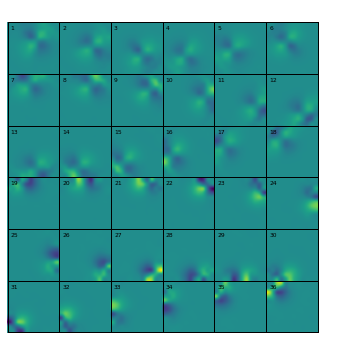

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

imsize = 84
fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('off')

# Create a blank canvas to hold all 36 images
canvas = np.zeros((6 * imsize, 6 * imsize))

# Fill canvas with scaled Laplacian patches
for i in range(6):
    for j in range(6):
        idx = j * 6 + i
        patch = laplacian[:, :, idx]
        # Resize to (imsize, imsize) if needed
        patch_resized = np.array(Image.fromarray(patch).resize((imsize, imsize), resample=Image.BICUBIC))
        x0, y0 = i * imsize, (5 - j) * imsize
        canvas[y0:y0+imsize, x0:x0+imsize] = patch_resized

        # Annotate the patch
        ax.text(x0 + 5, y0 + imsize - 12, str(idx + 1), color='black', fontsize=6)

# Show the full canvas
ax.imshow(canvas, cmap='viridis', origin='lower')

# Add bold black grid lines
for i in range(7):
    ax.plot([0, 6 * imsize], [i * imsize, i * imsize], color='black', linewidth=1)
    ax.plot([i * imsize, i * imsize], [0, 6 * imsize], color='black', linewidth=1)

plt.show()


In [6]:
# Test read_param_values.py
%autoreload 2
from cacofoni.imaka_io.getiparm import get_param_values, get_single_value
f = "../data/imakaparm.txt"

print(" Testing full row value lists (default behavior):")
print("sys_parm.nact:", get_param_values(f, "sys_parm.nact"))
print("sys_parm.nsub:", get_param_values(f, "sys_parm.nsub"))
print("sys_parm.nwfs:", get_param_values(f, "sys_parm.nwfs"))
print("wfscam_parm.npixx:", get_param_values(f, "wfscam_parm.npixx"))
print("target_parm.gs:", get_param_values(f, "target_parm.gs"))

print("\n Testing with which_column + type casting:")
print("nact (as int):", get_param_values(f, "sys_parm.nact", which_column=0, cast_type=int))
print("npixx (second column, as int):", get_param_values(f, "wfscam_parm.npixx", which_column=1, cast_type=int))
print("gs RA offset (3rd value):", get_param_values(f, "target_parm.gs", which_column=2, cast_type=float))

print("\n Testing single-value helper:")
print("nsub (int):", get_single_value(f, "sys_parm.nsub"))
print("npixx (col=1):", get_single_value(f, "wfscam_parm.npixx", column=1))

 Testing full row value lists (default behavior):
sys_parm.nact: [['64']]
sys_parm.nsub: [['12']]
sys_parm.nwfs: [['1']]
wfscam_parm.npixx: [['0', '120']]
target_parm.gs: [['0', 'GSNAME0', '0.00', '0.00', '0.00']]

 Testing with which_column + type casting:
nact (as int): [64]
npixx (second column, as int): [120]
gs RA offset (3rd value): [0.0]

 Testing single-value helper:
nsub (int): 12
npixx (col=1): 120


In [10]:
# Test file_utils.py
%autoreload 2
from cacofoni.utils.file_utils import get_valid_path
path = get_valid_path("~/cacofoni/cacofoni/data/imakaparm.txt", CacofoniConfig.default_filename)
print(path)

AttributeError: type object 'CacofoniConfig' has no attribute 'default_filename'

In [8]:
# Test initimakadatastruct.py
from cacofoni.imaka_io.initimakadatastruct import initimakadatastruct

fparam = "../data/imakaparm.txt"
ntimes = 3

data = initimakadatastruct(fparam, ntimes)

print("Number of frames:", len(data))
print("DM voltages size:", len(data[0]['dm']['voltages']))
print("WFS centroids size:", len(data[0]['wfs'][0]['centroids']))
print("WFSCAM pixels shape:", len(data[0]['wfscam'][0]['pixels']), "x", len(data[0]['wfscam'][0]['pixels'][0]))


WFS: 120x120 (14400) total pixels.
WFS: 12x12 (144) total subapertures.
WFS: 10 pixels per subaperture.
Number of frames: 3
DM voltages size: 64
WFS centroids size: 288
WFSCAM pixels shape: 120 x 120


In [7]:
config = CacophonyConfig()
fparam = config.fparam_path
default_filename_path = config.default_filename_path

In [27]:
# Test irdfits.py
from cacofoni.imaka_io.irdfits import irdfits
from astropy.io import fits
import numpy as np

with fits.open("../data/aocb0090.fits") as hdul:
    h0 = hdul[0].header
    d0 = hdul[0].data 
    ntimes = h0.get('NAXIS2', d0.shape[0]) 
    
cb = irdfits("../data/aocb0090.fits","../data/imakaparm.txt", exten=[1,0,0,1,0,0,0,0])
# Step 1: Get the centroids for WFS i=0 across all time steps

# Optional: quick check
print("mes1_centered shape:", mes1_centered.shape)
print("Centered row 0 (first 5):", mes1_centered[0, :5])


Loading telemetry FITS file...
Number of time steps: 27000
Number of WFS: 1

Setting up empty data structure...
WFS: 120x120 (14400) total pixels.
WFS: 12x12 (144) total subapertures.
WFS: 10 pixels per subaperture.

Checking extensions...

Running E0: 
Skipping E1: Raw wfscam data
Skipping E2: Processed wfscam data
Running E3: WFS centroids
(288, 27000)
mes1_centered shape: (288, 27000)
Centered row 0 (first 5): [0. 0. 0. 0. 0.]


In [18]:
# Test in IDL:
# cb = irdfits('~/cacofoni/cacofoni/data/aocb0090.fits', fparm='~/cacofoni/cacofoni/data/imakaparm.txt')

# Check the shape
# PRINT, SIZE(cb)    

# Check the first few values
#PRINT, freq[0:4]